In [2]:
import waveletAnalysis
from waveletFunctions import wave_signif, wavelet

variance =  0.5392375741582254
lag1 =  0.72


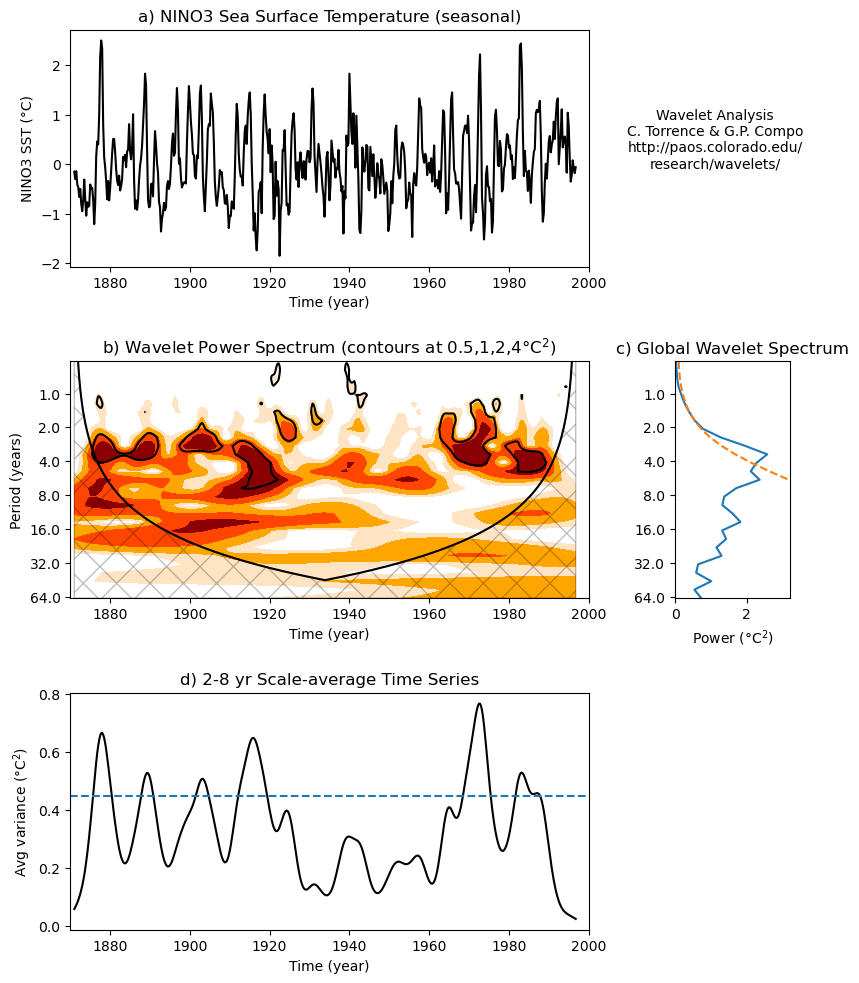

In [4]:
%run waveletAnalysis.py


# Aplicación a mis datos de Auger

In [1]:
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec

import numpy as np

# from mpl_toolkits.axes_grid1 import make_axes_locatable

from waveletFunctions import wave_signif, wavelet

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

import sys

In [3]:

sys.path.append('../augerscalerpy')
from scaler_cleaning import scaler_clean, plot_data

In [4]:

# READ THE DATA
#sst = np.loadtxt('sst_nino3.dat')  # input SST time series
sst = scaler_clean('../scaler_datasets/scaler_300s_FINAL.csv','scaler_300s_N9')
sst.set_index('Date', inplace=True) # Establece la columna 'Date' como el índice del DataFrame

Hay  (13663, 6) líneas vacías


/home/jennifer/Documentos/msc_tesis/scaler_for_solar_analysis/wave_python/../augerscalerpy/scaler_cleaning.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SDOK["Date"] = datetime.values


In [16]:
sst

,ScalerCorr,errmean,arrvar,activeSD,pressure
Date,,,,,
2005-12-31 23:59:46,1604.31,0.226024,2793.15,584,857.586
2006-01-01 00:09:46,1604.69,0.221103,2873.29,548,857.790
2006-01-01 00:14:46,1604.73,0.220782,2696.32,545,857.893
2006-01-01 00:19:46,1602.57,0.210147,2580.66,551,857.995
2006-01-01 00:24:46,1602.63,0.231709,2737.53,538,858.097
...,...,...,...,...,...
2021-09-30 18:34:46,1665.46,0.166624,3694.81,544,856.860
2021-09-30 18:39:46,1665.10,0.179557,3716.26,549,856.860
2021-09-30 18:44:46,1666.21,0.215630,3639.40,542,856.815


In [5]:

media = sst.mean()
std_dev = sst.std()
media,std_dev

(ScalerCorr    1659.087559
 errmean          0.182692
 arrvar        3148.065847
 activeSD       790.903397
 pressure       861.944672
 dtype: float64,
 ScalerCorr     16.171850
 errmean         0.095006
 arrvar        419.859891
 activeSD      164.545201
 pressure        4.035717
 dtype: float64)

In [6]:

#sst = sst - np.mean(sst)           ### En vez de esto dejaré el dataset normalizado.
variance = np.std(sst, ddof=1) ** 2
print("variance = ", variance)

variance =  ScalerCorr       261.528727
errmean            0.009026
arrvar        176282.327821
activeSD       27075.123292
pressure          16.287008
dtype: float64


/home/jennifer/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [7]:

from sklearn.preprocessing import StandardScaler

# Selecciona las columnas a normalizar
columns_to_normalize = ['ScalerCorr']

# Crea un objeto StandardScaler
scaler = StandardScaler()

# Aplica la normalización solo a las columnas seleccionadas
sst[columns_to_normalize] = scaler.fit_transform(sst[columns_to_normalize])
sst

,ScalerCorr,errmean,arrvar,activeSD,pressure
Date,,,,,
2005-12-31 23:59:46,-3.387218,0.226024,2793.15,584,857.586
2006-01-01 00:09:46,-3.363720,0.221103,2873.29,548,857.790
2006-01-01 00:14:46,-3.361247,0.220782,2696.32,545,857.893
2006-01-01 00:19:46,-3.494812,0.210147,2580.66,551,857.995
2006-01-01 00:24:46,-3.491102,0.231709,2737.53,538,858.097
...,...,...,...,...,...
2021-09-30 18:34:46,0.394045,0.166624,3694.81,544,856.860
2021-09-30 18:39:46,0.371784,0.179557,3716.26,549,856.860
2021-09-30 18:44:46,0.440422,0.215630,3639.40,542,856.815


In [8]:

# Calcular la varianza de los datos
variance = 1.0
sst = sst / np.std(sst, ddof=1)

# Obtener la longitud de los datos
n = len(sst)

# Definir el intervalo de tiempo en segundos (300 segundos en este caso)
dt = 300

# Crear un arreglo de tiempo basado en el número de datos y el intervalo
time_start = 2006.0  # Ajusta el valor de inicio de acuerdo a tus datos
time = np.arange(len(sst)) * dt + time_start  # Construye el arreglo de tiempo

# Definir el rango de tiempo para la representación gráfica
xlim = ([2006, 2021])

# Rellenar la serie temporal con ceros (opcional, recomendado)
pad = 1

# Configuración de la wavelet
dj = 0.25  # 4 sub-octavas por octava
s0 = 2 * dt  # Escala inicial de 6 meses
j1 = 7 / dj  # 7 potencias de 2 con sub-octavas dj
lag1 = 0.72  # Autocorrelación en retardo 1 para ruido rojo de fondo
print("lag1 =", lag1)
mother = 'MORLET'


lag1 = 0.72


/home/jennifer/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [9]:

sst_array = sst['ScalerCorr'].values  # Reemplaza 'column_name' con el nombre de la columna que deseas utilizar

In [10]:

# Wavelet transform:
wave, period, scale, coi = wavelet(sst_array, dt, pad, dj, s0, j1, mother)
power = (np.abs(wave)) ** 2  # compute wavelet power spectrum
global_ws = (np.sum(power, axis=1) / n)  # time-average over all times

In [11]:

# Significance levels:
signif = wave_signif(([variance]), dt=dt, sigtest=0, scale=scale,
    lag1=lag1, mother=mother)
# expand signif --> (J+1)x(N) array
sig95 = signif[:, np.newaxis].dot(np.ones(n)[np.newaxis, :])
sig95 = power / sig95  # where ratio > 1, power is significant

In [12]:

# Global wavelet spectrum & significance levels:
dof = n - scale  # the -scale corrects for padding at edges
global_signif = wave_signif(variance, dt=dt, scale=scale, sigtest=1,
    lag1=lag1, dof=dof, mother=mother)

In [13]:

# Scale-average between El Nino periods of 2--8 years
avg = np.logical_and(scale >= 2, scale < 8)
Cdelta = 0.776  # this is for the MORLET wavelet
# expand scale --> (J+1)x(N) array
scale_avg = scale[:, np.newaxis].dot(np.ones(n)[np.newaxis, :])
scale_avg = power / scale_avg  # [Eqn(24)]
scale_avg = dj * dt / Cdelta * sum(scale_avg[avg, :])  # [Eqn(24)]
scaleavg_signif = wave_signif(variance, dt=dt, scale=scale, sigtest=2, lag1=lag1, dof=([2, 7.9]), mother=mother)

ERROR: No valid scales between 2 and 7.9

NaN result encountered.


/home/jennifer/Documentos/msc_tesis/scaler_for_solar_analysis/wave_python/waveletFunctions.py:390: RuntimeWarning: divide by zero encountered in scalar divide
  Savg = 1. / np.sum(1. / scale[avg])  # [Eqn(25)]
/home/jennifer/Documentos/msc_tesis/scaler_for_solar_analysis/wave_python/waveletFunctions.py:392: RuntimeWarning: invalid value encountered in scalar multiply
  dof = (dofmin * navg * Savg / Smid) * \
/home/jennifer/Documentos/msc_tesis/scaler_for_solar_analysis/wave_python/waveletFunctions.py:394: RuntimeWarning: invalid value encountered in scalar multiply
  fft_theor = Savg * np.sum(fft_theor[avg] / scale[avg])  # [Eqn(27)]


### Plot

InvalidIndexError: (slice(None, None, None), None)

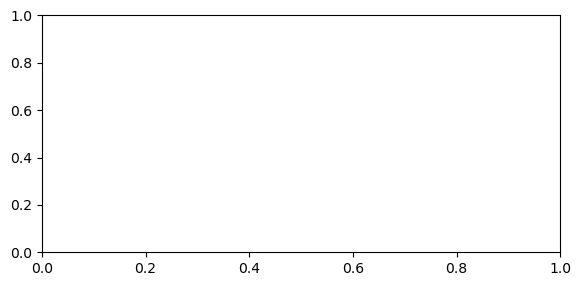

In [14]:
# ------------------------------------------------------ Plotting

# --- Plot time series
fig = plt.figure(figsize=(9, 10))
gs = GridSpec(3, 4, hspace=0.4, wspace=0.75)
plt.subplots_adjust(left=0.1, bottom=0.05, right=0.9, top=0.95,
                    wspace=0, hspace=0)
plt.subplot(gs[0, 0:3])
plt.plot(time, sst, 'k')
plt.xlim(xlim[:])
plt.xlabel('Time (year)')
plt.ylabel('NINO3 SST (\u00B0C)')
plt.title('a) NINO3 Sea Surface Temperature (seasonal)')

plt.text(time[-1] + 35, 0.5, 'Wavelet Analysis\nC. Torrence & G.P. Compo\n'
    'http://paos.colorado.edu/\nresearch/wavelets/',
    horizontalalignment='center', verticalalignment='center')

# --- Contour plot wavelet power spectrum
# plt3 = plt.subplot(3, 1, 2)
plt3 = plt.subplot(gs[1, 0:3])
levels = [0, 0.5, 1, 2, 4, 999]
# *** or use 'contour'
CS = plt.contourf(time, period, power, len(levels))
im = plt.contourf(CS, levels=levels,
    colors=['white', 'bisque', 'orange', 'orangered', 'darkred'])
plt.xlabel('Time (year)')
plt.ylabel('Period (years)')
plt.title('b) Wavelet Power Spectrum (contours at 0.5,1,2,4\u00B0C$^2$)')
plt.xlim(xlim[:])
# 95# significance contour, levels at -99 (fake) and 1 (95# signif)
plt.contour(time, period, sig95, [-99, 1], colors='k')
# cone-of-influence, anything "below" is dubious
plt.fill_between(time, coi * 0 + period[-1], coi, facecolor="none",
    edgecolor="#00000040", hatch='x')
plt.plot(time, coi, 'k')
# format y-scale
plt3.set_yscale('log', base=2, subs=None)
plt.ylim([np.min(period), np.max(period)])
ax = plt.gca().yaxis
ax.set_major_formatter(ticker.ScalarFormatter())
plt3.ticklabel_format(axis='y', style='plain')
plt3.invert_yaxis()
# set up the size and location of the colorbar
# position=fig.add_axes([0.5,0.36,0.2,0.01])
# plt.colorbar(im, cax=position, orientation='horizontal')
#   , fraction=0.05, pad=0.5)

# plt.subplots_adjust(right=0.7, top=0.9)

# --- Plot global wavelet spectrum
plt4 = plt.subplot(gs[1, -1])
plt.plot(global_ws, period)
plt.plot(global_signif, period, '--')
plt.xlabel('Power (\u00B0C$^2$)')
plt.title('c) Global Wavelet Spectrum')
plt.xlim([0, 1.25 * np.max(global_ws)])
# format y-scale
plt4.set_yscale('log', base=2, subs=None)
plt.ylim([np.min(period), np.max(period)])
ax = plt.gca().yaxis
ax.set_major_formatter(ticker.ScalarFormatter())
plt4.ticklabel_format(axis='y', style='plain')
plt4.invert_yaxis()

# --- Plot 2--8 yr scale-average time series
plt.subplot(gs[2, 0:3])
plt.plot(time, scale_avg, 'k')
plt.xlim(xlim[:])
plt.xlabel('Time (year)')
plt.ylabel('Avg variance (\u00B0C$^2$)')
plt.title('d) 2-8 yr Scale-average Time Series')
plt.plot(xlim, scaleavg_signif + [0, 0], '--')

plt.show()
